In [60]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
%matplotlib inline

In [61]:
conn = pymysql.Connect(host='localhost', port=3306, user='root', passwd='root', db='lequ', charset='utf8')
sql = 'select * from lequ_user'
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签

In [165]:
data = pd.read_sql(sql, conn)

In [63]:
data.head()

,id,name,create_time,active_time,last_login,last_activity,area,signature,reply_times,theme_nums,identity,forum_money,uid,friend_nums
0,1,乐趣—小帅,1970-1-1 08:00,5070,2019-4-18 16:05,2019-4-18 16:05,"GMT+08:00北京,香港,帕斯,新加坡,台北",从正面看，是伟大的神God从反面看，是卑鄙小人dog。其实，人们所犯的罪恶evil，反过来，...,17244,415,乐趣网客服,39365,11343123,0
1,2,757区焦语,2015-9-14 11:29,462,2019-4-18 19:59,2019-4-18 19:30,使用系统默认,,672,164,Lv6 大将军,764,32329958,0
2,3,一笑,2012-12-8 17:46,156,2019-4-19 00:42,2019-4-19 00:42,使用系统默认,,281,67,Lv4 护军,2993,23389456,0
3,4,偶滴神啊,2012-6-5 15:58,1108,2019-4-18 22:07,2019-4-18 22:07,使用系统默认,,2161,171,Lv8 丞相,1453,16875104,0
4,5,375831204,2013-5-21 20:29,1030,2019-4-18 20:45,2019-4-18 20:45,使用系统默认,,966,282,Lv7 大司马,15291,21499759,0


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


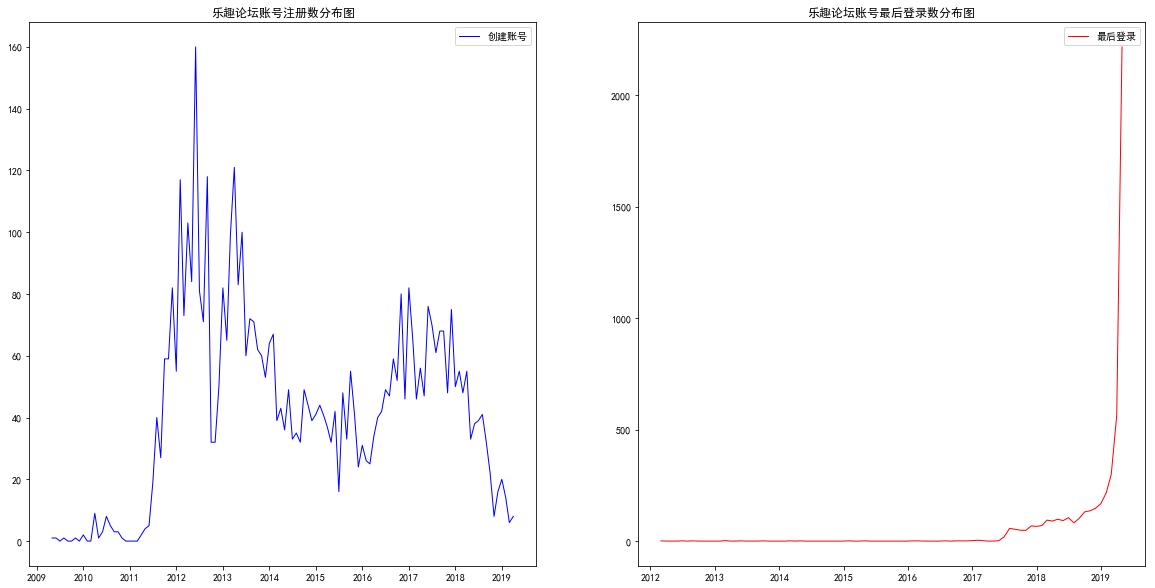

In [129]:
# 绘制创建时间分布图
def create_time(data):
    data['create_time'] = data['create_time'].map(lambda x:x.split()[0])
    data['last_login'] = data['last_login'].map(lambda x:x.split()[0])
    data = data[data['create_time']!='1970-1-1']
    data['create_time'] = pd.to_datetime(data['create_time'])
    data['last_login'] = pd.to_datetime(data['last_login'])
    tempdata_create = data.set_index('create_time')
    tempdata_create = tempdata_create.resample('M').count()
    tempdata_login = data.set_index('last_login')
    tempdata_login = tempdata_login.resample('M').count()
    #print(tempdata_create)
    x_create = tempdata_create.index
    y_create = tempdata_create.loc[:,'id']
    x_login = tempdata_login.index
    y_login = tempdata_login.loc[:,'id']
    #print(x)
    #print(y_create)
    #print(y_login)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.plot(x_create, y_create, color='blue', linewidth=1.0, linestyle='-', label='创建账号')
    plt.legend()
    plt.title('乐趣论坛账号注册数分布图')
    plt.subplot(1,2,2)
    plt.plot(x_login, y_login, color='red', linewidth=1.0, linestyle='-', label='最后登录')
    # 显示图示
    plt.legend()
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))
    #plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title('乐趣论坛账号最后登录数分布图')
    plt.savefig('lequ_create_time.png')
    plt.show()
create_time(data)

In [69]:
data.describe()

,id,active_time,reply_times,theme_nums,forum_money,uid,friend_nums
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5.027000e+03,5027.0
mean,2514.000000,315.721106,154.436045,27.754724,344.722896,2.572826e+07,0.0
std,1451.314232,532.741676,573.868056,152.996994,1136.861706,8.672868e+06,0.0
min,1.000000,1.000000,-31.000000,0.000000,-440.000000,1.016000e+04,0.0
25%,1257.500000,36.000000,7.000000,2.000000,0.000000,1.741458e+07,0.0
50%,2514.000000,132.000000,29.000000,7.000000,30.000000,2.765435e+07,0.0
75%,3770.500000,364.000000,117.000000,23.000000,213.000000,3.340776e+07,0.0
max,5027.000000,12122.000000,23977.000000,9931.000000,39365.000000,3.640603e+07,0.0


In [111]:
import numpy as np
data['reply_times'] = data['reply_times'].map(lambda x:np.abs(x))
data['forum_money'] = data['forum_money'].map(lambda x:np.abs(x))

In [112]:
data.describe()

,id,active_time,reply_times,theme_nums,forum_money,uid,friend_nums,reply_time
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5.027000e+03,5027.0,5027.000000
mean,2514.000000,315.721106,154.454744,27.754724,345.450965,2.572826e+07,0.0,154.454744
std,1451.314232,532.741676,573.863022,152.996994,1136.640640,8.672868e+06,0.0,573.863022
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.016000e+04,0.0,0.000000
25%,1257.500000,36.000000,7.000000,2.000000,0.000000,1.741458e+07,0.0,7.000000
50%,2514.000000,132.000000,29.000000,7.000000,30.000000,2.765435e+07,0.0,29.000000
75%,3770.500000,364.000000,117.000000,23.000000,216.000000,3.340776e+07,0.0,117.000000
max,5027.000000,12122.000000,23977.000000,9931.000000,39365.000000,3.640603e+07,0.0,23977.000000


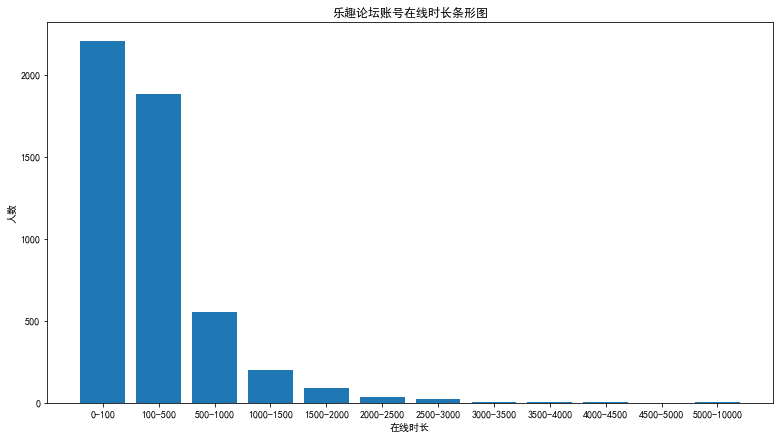

In [144]:
# 乐趣论坛账号在线时长条形图
def active_time(data):
    active1 = data[data['active_time']<=100].count().id
    active2 = data[(data['active_time']>100)&(data['active_time']<=500)].count().id
    active3 = data[(data['active_time']>500)&(data['active_time']<=1000)].count().id
    active4 = data[(data['active_time']>1000)&(data['active_time']<=1500)].count().id
    active5 = data[(data['active_time']>1500)&(data['active_time']<=2000)].count().id
    active6 = data[(data['active_time']>2000)&(data['active_time']<=2500)].count().id
    active7 = data[(data['active_time']>2500)&(data['active_time']<=3000)].count().id
    active8 = data[(data['active_time']>3000)&(data['active_time']<=3500)].count().id
    active9 = data[(data['active_time']>3500)&(data['active_time']<=4000)].count().id
    active10 = data[(data['active_time']>4000)&(data['active_time']<=4500)].count().id
    active11 = data[(data['active_time']>4500)&(data['active_time']<=5000)].count().id
    active12 = data[data['active_time']>5000].count().id
    x = ['0-100', '100-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-10000']
    y = [active1, active2, active3, active4, active5, active6, active7, active8, active9, active10, active11, active12]
    fig = plt.figure(figsize=(13,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x, y)
    ax.set_xlabel('在线时长')
    ax.set_ylabel('人数')
    plt.title('乐趣论坛账号在线时长条形图')
    plt.savefig('lequ_active_time.png')
    plt.show()
active_time(data)

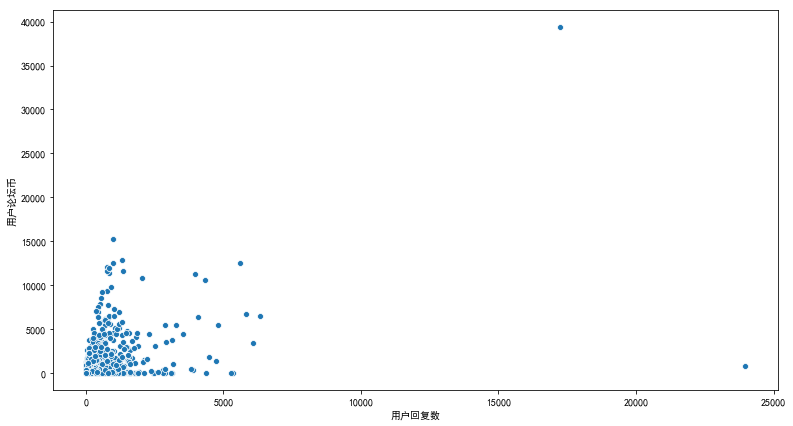

In [153]:
# 乐趣论坛用户回复数与论坛币折线图
def money_reply(data):
    import numpy as np
    import seaborn as sns
    data['reply_times'] = data['reply_times'].map(lambda x:np.abs(x))
    data['forum_money'] = data['forum_money'].map(lambda x:np.abs(x))
    x = data['reply_times']
    y = data['forum_money']
    plt.figure(figsize=(13,7))
    ax = sns.scatterplot(x, y)
    ax.set_xlabel('用户回复数')
    ax.set_ylabel('用户论坛币')
    plt.savefig('money_reply.png')
    plt.show()
money_reply(data)

,id,name,content,public_time,read_count,reply_count
0,20,乐趣—小帅,论坛币系统，官方出这个系统的初衷一方面是为了调节论坛的活跃度，另一方面也是希望玩家在论坛积极...,2018-8-17 10:17,117381,24879
1,44949,gunn***,,2012-5-27 22:36,133365,5886
2,2172,yb65***,,2013-5-1 05:45,166492,5131
3,21275,乐趣—小帅,,2017-9-25 13:50,36418,1343
4,11898,乐趣—小帅,,2017-9-7 13:37,34333,1096
5,22186,乐趣—小帅,1）官方提供给玩家大额免费金币（充值渠道是关闭的。）亲爱的玩家可以在测试服体验新武将、新版本...,2017-7-7 14:27,29350,936
6,3621,乐趣—小帅,双12武将搭配晒晒活动~晒一晒过图&PK常用武将搭配，晒一晒对武将理解心得。1）踩到楼层含数...,2018-12-11 16:20,8118,537
7,12803,乐趣网-貂芷,,2014-1-22 11:01,73171,468
8,49057,3937***,,2013-6-2 22:26,37560,467
9,39115,沧海云天,坊间客服吹风关羽，张辽和孙策将如何如何改动，如果真如此，我只想对吴国的玩家们说：此游戏设计不...,2018-10-20 16:31,9445,463


{'name': '乐趣—小帅', 'content': '论坛币系统，官方出这个系统的初衷一方面是为了调节论坛的活跃度，另一方面也是希望玩家在论坛积极交流的同时可以得到一些额外的奖励，但是出来了之后有违初衷，很多大家为了论坛币水贴，甚至还造成了一些负担。所以考虑再三把之前的每日3帖，回复10条改成了每日1帖，回复5条。现在官方再次调整在奖励不变的情况下改动为', 'public_time': '2018-8-17 10:17', 'read_count': 117381, 'reply_count': 24879}
{'name': 'gunn***', 'content': '', 'public_time': '2012-5-27 22:36', 'read_count': 133365, 'reply_count': 5886}
{'name': 'yb65***', 'content': '', 'public_time': '2013-5-1 05:45', 'read_count': 166492, 'reply_count': 5131}
{'name': '乐趣—小帅', 'content': '', 'public_time': '2017-9-25 13:50', 'read_count': 36418, 'reply_count': 1343}
{'name': '乐趣—小帅', 'content': '', 'public_time': '2017-9-7 13:37', 'read_count': 34333, 'reply_count': 1096}
{'name': '乐趣—小帅', 'content': '1）官方提供给玩家大额免费金币（充值渠道是关闭的。）亲爱的玩家可以在测试服体验新武将、新版本、新地图、新活动；测试武将平衡性，探索玩法和武将组合等。2）温馨提示：体验服由于服务器经常维护更新以及不稳定性会定期进行关闭维护哦。3）玩家选择组成：每个国家选取20人，分别由小，中，大R组成。1）区服：XXX2）角色：XXX3）联系QQ：XXX（官方会给与保密，帖子是仅作者可见）被录取的玩家小编会及时的通过QQ跟亲们联系哦，后续亲们在测试过程中收集到的建议，BUG可以直接发给小编的QQ，由小编这里整理反馈给大大们，另外还有奖励哦~亲爱的玩

In [166]:
data['identity'].unique()

array(['乐趣网客服', 'Lv6 大将军', 'Lv4 护军', 'Lv8 丞相', 'Lv7 大司马', 'Lv5 骠骑将军',
       'Lv3 偏将', 'Lv2 兵士', '超级版主', 'Lv9 诸侯', 'SNSFun - BAN1', '勋章颁发'],
      dtype=object)

In [168]:
[data['identity'].count(x) for x in data['identity'].unique()]

KeyError: 'Level 乐趣网客服 must be same as name (None)'

In [172]:
levels = data['identity'].value_counts()

In [183]:
levels

Lv2 兵士           1334
Lv3 偏将           1088
Lv4 护军            900
Lv5 骠骑将军          573
Lv7 大司马           441
Lv6 大将军           371
Lv8 丞相            181
SNSFun - BAN1      96
Lv9 诸侯             38
乐趣网客服               3
超级版主                1
Name: identity, dtype: int64

In [174]:
levels.index

Index(['Lv2 兵士', 'Lv3 偏将', 'Lv4 护军', 'Lv5 骠骑将军', 'Lv7 大司马', 'Lv6 大将军',
       'Lv8 丞相', 'SNSFun - BAN1', 'Lv9 诸侯', '乐趣网客服', '勋章颁发', '超级版主'],
      dtype='object')

In [182]:
levels = levels.drop('勋章颁发')
levels

KeyError: "['勋章颁发'] not found in axis"

In [177]:
levels.index

Index(['Lv2 兵士', 'Lv3 偏将', 'Lv4 护军', 'Lv5 骠骑将军', 'Lv7 大司马', 'Lv6 大将军',
       'Lv8 丞相', 'SNSFun - BAN1', 'Lv9 诸侯', '乐趣网客服', '超级版主'],
      dtype='object')

In [181]:
levels.get_values()

array([1334, 1088,  900,  573,  441,  371,  181,   96,   38,    3,    1],
      dtype=int64)